# Make Moons Classification

## Load Dataset

In [1]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [2]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (100, 2)
y shape: (100,)


In [3]:
X[:5]

array([[ 1.87756309,  0.56839425],
       [ 0.36877983, -0.34894509],
       [ 0.96515318,  0.10921819],
       [ 0.48599685,  0.20291313],
       [ 1.72532644,  0.53367598]])

## Split Dataset into Train and Test

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

## Train and Evaluate Model

### Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=5, random_state=2)
random_forest_model.fit(X_train, y_train)

print("Test set score: {:.3f}".format(random_forest_model.score(X_test, y_test)))
print("Train set score: {:.3f}".format(random_forest_model.score(X_train, y_train)))

Test set score: 0.920
Train set score: 0.960


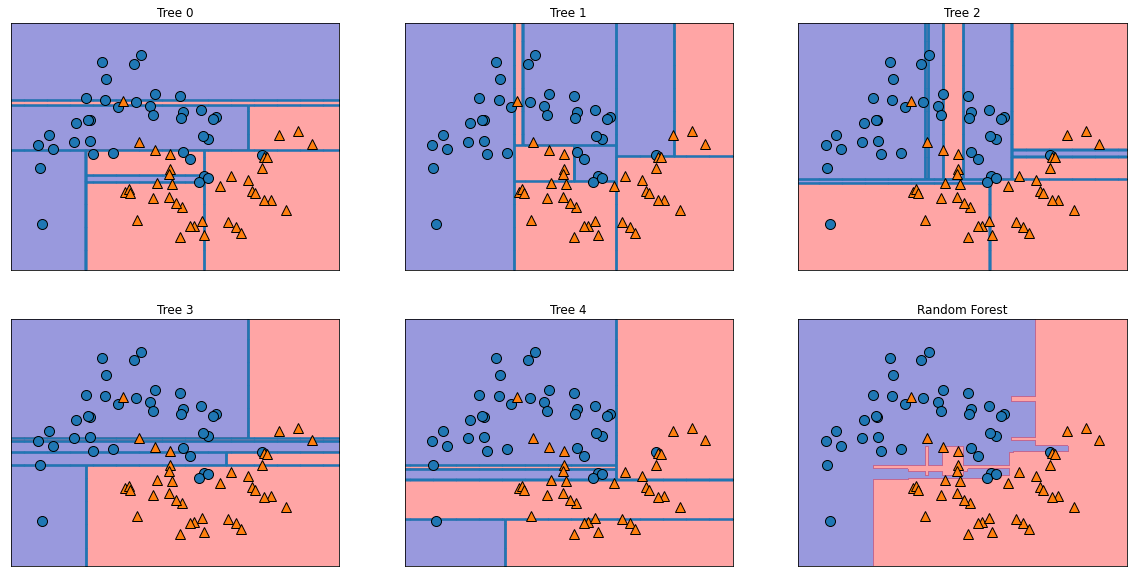

In [6]:
# Visualization
import mglearn
from matplotlib import pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), random_forest_model.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(random_forest_model, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

### Multilation Perceptron (MLP)

In [7]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(solver="lbfgs", hidden_layer_sizes=(100,), random_state=0)
mlp_model.fit(X_train, y_train)

print("Test set score: {:.3f}".format(mlp_model.score(X_test, y_test)))
print("Train set score: {:.3f}".format(mlp_model.score(X_train, y_train)))

Test set score: 0.880
Train set score: 1.000


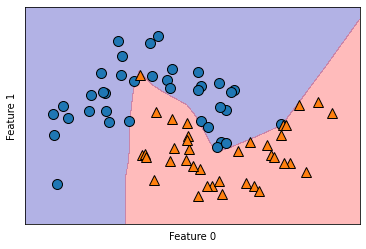

In [8]:
# Visualization
import mglearn
from matplotlib import pyplot as plt


def visualize_plot_2d_seperator(model):
    mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.show()


visualize_plot_2d_seperator(mlp_model)

In [9]:
mlp_model_layer10 = MLPClassifier(solver="lbfgs", hidden_layer_sizes=(10,), max_iter=1000, random_state=0)
mlp_model_layer10.fit(X_train, y_train)

print("Test set score: {:.3f}".format(mlp_model_layer10.score(X_test, y_test)))
print("Train set score: {:.3f}".format(mlp_model_layer10.score(X_train, y_train)))

Test set score: 0.880
Train set score: 0.987


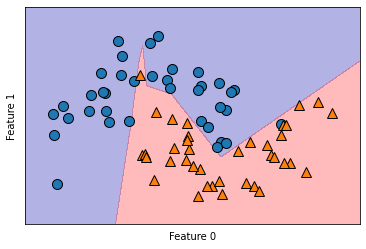

In [10]:
# Visualization
visualize_plot_2d_seperator(mlp_model_layer10)

In [11]:
mlp_model_layer10x10 = MLPClassifier(solver="lbfgs", hidden_layer_sizes=(10, 10), max_iter=1000, random_state=0)
mlp_model_layer10x10.fit(X_train, y_train)

print("Test set score: {:.3f}".format(mlp_model_layer10x10.score(X_test, y_test)))
print("Train set score: {:.3f}".format(mlp_model_layer10x10.score(X_train, y_train)))

Test set score: 0.840
Train set score: 0.987


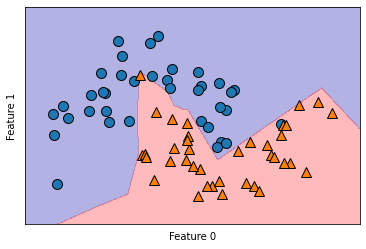

In [12]:
# Visualization
visualize_plot_2d_seperator(mlp_model_layer10x10)

In [13]:
mlp_model_tanh_layer10x10 = MLPClassifier(solver="lbfgs", activation="tanh", hidden_layer_sizes=(10, 10), max_iter=1000,
                                          random_state=0)
mlp_model_tanh_layer10x10.fit(X_train, y_train)

print("Test set score: {:.3f}".format(mlp_model_tanh_layer10x10.score(X_test, y_test)))
print("Train set score: {:.3f}".format(mlp_model_tanh_layer10x10.score(X_train, y_train)))

Test set score: 0.840
Train set score: 1.000


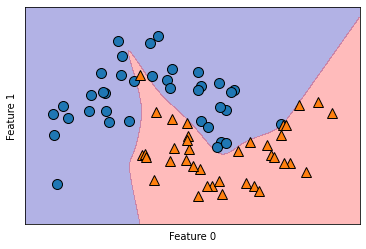

In [14]:
# Visualization
visualize_plot_2d_seperator(mlp_model_tanh_layer10x10)